<a href="https://colab.research.google.com/github/gagansingh23/DS/blob/master/Strains_Visual_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

     |████████████████████████████████| 102kB 2.4MB/s 
ERROR: Operation cancelled by user


KeyboardInterrupt: ignored

In [2]:
import requests
import json
import pandas as pd
#import os
#from dotenv import load_dotenv
#load_dotenv()
#API_KEY = os.getenv("API_KEY")

API_KEY = 'uEH5NtA'

request_url = f"http://strainapi.evanbusse.com/{API_KEY}/strains/search/all"
response = requests.get(request_url)
data = json.loads(response.text)

print(request_url)
print(type(response)) #> <class 'requests.models.Response'>
print(response.status_code) #> 200
print(type(response.text)) #> <class 'str'>
print(type(data)) #> <class 'dict'>

http://strainapi.evanbusse.com/uEH5NtA/strains/search/all
<class 'requests.models.Response'>
200
<class 'str'>
<class 'dict'>


In [4]:
# All strains
strain_names = pd.DataFrame(list(data.keys()), columns =['name'])
strain_names.head()

,name
0,Afpak
1,African
2,Afternoon Delight
3,Afwreck
4,Agent Orange


In [5]:
# Get strain characteristics
strain_values = list(data.values())
strain_values = pd.DataFrame.from_dict(strain_values)
strain_values.head()

,id,race,flavors,effects
0,1,hybrid,"[Earthy, Chemical, Pine]","{'positive': ['Relaxed', 'Hungry', 'Happy', 'S..."
1,2,sativa,"[Spicy/Herbal, Pungent, Earthy]","{'positive': ['Euphoric', 'Happy', 'Creative',..."
2,3,hybrid,"[Pepper, Flowery, Pine]","{'positive': ['Relaxed', 'Hungry', 'Euphoric',..."
3,4,hybrid,"[Pine, Earthy, Flowery]","{'positive': ['Relaxed', 'Happy', 'Creative', ..."
4,5,hybrid,"[Citrus, Orange, Sweet]","{'positive': ['Relaxed', 'Euphoric', 'Happy', ..."


In [6]:
# Add strain name to the dataframe
strains = pd.concat([strain_names, strain_values], axis=1)
strains.head()

,name,id,race,flavors,effects
0,Afpak,1,hybrid,"[Earthy, Chemical, Pine]","{'positive': ['Relaxed', 'Hungry', 'Happy', 'S..."
1,African,2,sativa,"[Spicy/Herbal, Pungent, Earthy]","{'positive': ['Euphoric', 'Happy', 'Creative',..."
2,Afternoon Delight,3,hybrid,"[Pepper, Flowery, Pine]","{'positive': ['Relaxed', 'Hungry', 'Euphoric',..."
3,Afwreck,4,hybrid,"[Pine, Earthy, Flowery]","{'positive': ['Relaxed', 'Happy', 'Creative', ..."
4,Agent Orange,5,hybrid,"[Citrus, Orange, Sweet]","{'positive': ['Relaxed', 'Euphoric', 'Happy', ..."


In [7]:
# Get a line for each flavor
strains = strains.flavors.apply(pd.Series) \
    .merge(strains, right_index = True, left_index = True) \
    .drop(["flavors"], axis = 1) \
    .melt(id_vars = ['name', 'id', 'race', 'effects'], value_name = "flavor") \
    .drop("variable", axis = 1) \
    .dropna() \
    .sort_values(by='id', ascending=1)
strains

,name,id,race,effects,flavor
0,Afpak,1,hybrid,"{'positive': ['Relaxed', 'Hungry', 'Happy', 'S...",Earthy
3940,Afpak,1,hybrid,"{'positive': ['Relaxed', 'Hungry', 'Happy', 'S...",Pine
1970,Afpak,1,hybrid,"{'positive': ['Relaxed', 'Hungry', 'Happy', 'S...",Chemical
1,African,2,sativa,"{'positive': ['Euphoric', 'Happy', 'Creative',...",Spicy/Herbal
3941,African,2,sativa,"{'positive': ['Euphoric', 'Happy', 'Creative',...",Earthy
...,...,...,...,...,...
3938,Zoom Pie,2161,indica,"{'positive': ['Relaxed', 'Hungry', 'Happy', 'U...",Earthy
5908,Zoom Pie,2161,indica,"{'positive': ['Relaxed', 'Hungry', 'Happy', 'U...",Pungent
3939,ʻAlenuihāhā,2162,hybrid,"{'positive': ['Euphoric', 'Happy', 'Creative',...",Tropical
1969,ʻAlenuihāhā,2162,hybrid,"{'positive': ['Euphoric', 'Happy', 'Creative',...",Sweet


In [8]:
# Get a line for each type of effect
strains = strains.effects.apply(pd.Series) \
    .merge(strains, right_index = True, left_index = True) \
    .drop(["effects"], axis = 1)
strains

,positive,negative,medical,name,id,race,flavor
0,"[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Afpak,1,hybrid,Earthy
3940,"[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Afpak,1,hybrid,Pine
1970,"[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Afpak,1,hybrid,Chemical
1,"[Euphoric, Happy, Creative, Energetic, Talkative]",[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",African,2,sativa,Spicy/Herbal
3941,"[Euphoric, Happy, Creative, Energetic, Talkative]",[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",African,2,sativa,Earthy
...,...,...,...,...,...,...,...
3938,"[Relaxed, Hungry, Happy, Uplifted, Giggly]",[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",Zoom Pie,2161,indica,Earthy
5908,"[Relaxed, Hungry, Happy, Uplifted, Giggly]",[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",Zoom Pie,2161,indica,Pungent
3939,"[Euphoric, Happy, Creative, Energetic, Aroused]","[Dizzy, Dry Mouth, Paranoid, Anxious]","[Depression, Stress, Fatigue]",ʻAlenuihāhā,2162,hybrid,Tropical
1969,"[Euphoric, Happy, Creative, Energetic, Aroused]","[Dizzy, Dry Mouth, Paranoid, Anxious]","[Depression, Stress, Fatigue]",ʻAlenuihāhā,2162,hybrid,Sweet


In [9]:
# Get a line for each positive effect
strains = strains.positive.apply(pd.Series) \
    .merge(strains, right_index = True, left_index = True) \
    .drop(["positive"], axis = 1) \
    .melt(id_vars = ['name', 'id', 'race', 'flavor', 'negative', 'medical'], value_name = "positive_effect") \
    .drop("variable", axis = 1) 
strains

,name,id,race,flavor,negative,medical,positive_effect
0,Afpak,1,hybrid,Earthy,[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Relaxed
1,Afpak,1,hybrid,Pine,[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Relaxed
2,Afpak,1,hybrid,Chemical,[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Relaxed
3,African,2,sativa,Spicy/Herbal,[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",Euphoric
4,African,2,sativa,Earthy,[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",Euphoric
...,...,...,...,...,...,...,...
28975,Zoom Pie,2161,indica,Earthy,[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",Giggly
28976,Zoom Pie,2161,indica,Pungent,[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",Giggly
28977,ʻAlenuihāhā,2162,hybrid,Tropical,"[Dizzy, Dry Mouth, Paranoid, Anxious]","[Depression, Stress, Fatigue]",Aroused
28978,ʻAlenuihāhā,2162,hybrid,Sweet,"[Dizzy, Dry Mouth, Paranoid, Anxious]","[Depression, Stress, Fatigue]",Aroused


In [10]:
# Get a line for each negative effect
strains = strains.negative.apply(pd.Series) \
    .merge(strains, right_index = True, left_index = True) \
    .drop(["negative"], axis = 1) \
    .melt(id_vars = ['name', 'id', 'race', 'flavor', 'positive_effect', 'medical'], value_name = "negative_effect") \
    .drop("variable", axis = 1)
strains

,name,id,race,flavor,positive_effect,medical,negative_effect
0,Afpak,1,hybrid,Earthy,Relaxed,"[Depression, Insomnia, Pain, Stress, Lack of A...",Dizzy
1,Afpak,1,hybrid,Pine,Relaxed,"[Depression, Insomnia, Pain, Stress, Lack of A...",Dizzy
2,Afpak,1,hybrid,Chemical,Relaxed,"[Depression, Insomnia, Pain, Stress, Lack of A...",Dizzy
3,African,2,sativa,Spicy/Herbal,Euphoric,"[Depression, Pain, Stress, Lack of Appetite, N...",Dry Mouth
4,African,2,sativa,Earthy,Euphoric,"[Depression, Pain, Stress, Lack of Appetite, N...",Dry Mouth
...,...,...,...,...,...,...,...
144895,Zoom Pie,2161,indica,Earthy,Giggly,"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",NaN
144896,Zoom Pie,2161,indica,Pungent,Giggly,"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",NaN
144897,ʻAlenuihāhā,2162,hybrid,Tropical,Aroused,"[Depression, Stress, Fatigue]",NaN
144898,ʻAlenuihāhā,2162,hybrid,Sweet,Aroused,"[Depression, Stress, Fatigue]",NaN


In [11]:
# Get a line for each medical effect
strains = strains.medical.apply(pd.Series) \
    .merge(strains, right_index = True, left_index = True) \
    .drop(["medical"], axis = 1) \
    .melt(id_vars = ['name', 'id', 'race', 'flavor', 'positive_effect', 'negative_effect'], value_name = "illness") \
    .drop("variable", axis = 1)
strains

,name,id,race,flavor,positive_effect,negative_effect,illness
0,Afpak,1,hybrid,Earthy,Relaxed,Dizzy,Depression
1,Afpak,1,hybrid,Pine,Relaxed,Dizzy,Depression
2,Afpak,1,hybrid,Chemical,Relaxed,Dizzy,Depression
3,African,2,sativa,Spicy/Herbal,Euphoric,Dry Mouth,Depression
4,African,2,sativa,Earthy,Euphoric,Dry Mouth,Depression
...,...,...,...,...,...,...,...
869395,Zoom Pie,2161,indica,Earthy,Giggly,NaN,NaN
869396,Zoom Pie,2161,indica,Pungent,Giggly,NaN,NaN
869397,ʻAlenuihāhā,2162,hybrid,Tropical,Aroused,NaN,NaN
869398,ʻAlenuihāhā,2162,hybrid,Sweet,Aroused,NaN,NaN


In [12]:
# Count null values
strains.isnull().sum()

name                    0
id                      0
race                    0
flavor                  0
positive_effect     47340
negative_effect    452340
illness            151425
dtype: int64

In [13]:
strains.sort_values(by='id', ascending=1)

,name,id,race,flavor,positive_effect,negative_effect,illness
0,Afpak,1,hybrid,Earthy,Relaxed,Dizzy,Depression
336169,Afpak,1,hybrid,Pine,Sleepy,NaN,Pain
336168,Afpak,1,hybrid,Earthy,Sleepy,NaN,Pain
104328,Afpak,1,hybrid,Earthy,Sleepy,NaN,Depression
104329,Afpak,1,hybrid,Pine,Sleepy,NaN,Depression
...,...,...,...,...,...,...,...
585395,ʻAlenuihāhā,2162,hybrid,Pineapple,Euphoric,Dizzy,NaN
591189,ʻAlenuihāhā,2162,hybrid,Tropical,Happy,Dizzy,NaN
591190,ʻAlenuihāhā,2162,hybrid,Sweet,Happy,Dizzy,NaN
863603,ʻAlenuihāhā,2162,hybrid,Pineapple,Energetic,NaN,NaN


In [0]:
#import category_encoders as ce
#encoder = ce.OneHotEncoder(use_cat_names=True)
#strains_encoded = encoder.fit_transform(strains)

In [15]:
strains['flavor'].nunique()

48

In [16]:
strains['positive_effect'].nunique()

13

In [17]:
strains['negative_effect'].nunique()

5

In [18]:
strains['illness'].nunique()

15

In [19]:
strains.head(
)

,name,id,race,flavor,positive_effect,negative_effect,illness
0,Afpak,1,hybrid,Earthy,Relaxed,Dizzy,Depression
1,Afpak,1,hybrid,Pine,Relaxed,Dizzy,Depression
2,Afpak,1,hybrid,Chemical,Relaxed,Dizzy,Depression
3,African,2,sativa,Spicy/Herbal,Euphoric,Dry Mouth,Depression
4,African,2,sativa,Earthy,Euphoric,Dry Mouth,Depression


In [20]:
strains['flavor'].unique()

array(['Earthy', 'Pine', 'Chemical', 'Spicy/Herbal', 'Pungent', 'Pepper',
       'Flowery', 'Citrus', 'Sweet', 'Orange', 'Skunk', 'Woody', 'Grape',
       'Minty', 'Cheese', 'Tropical', 'Diesel', 'Grapefruit', 'Lemon',
       'Nutty', 'Berry', 'Blueberry', 'Ammonia', 'Apple', 'Rose',
       'Butter', 'Mango', 'Honey', 'Tea', 'Lime', 'Lavender',
       'Strawberry', 'Mint', 'Chestnut', 'Tree Fruit', 'Pear', 'Apricot',
       'Peach', 'Blue Cheese', 'Menthol', 'Coffee', 'Tar', 'Pineapple',
       'Sage', 'Vanilla', 'Plum', 'Tobacco', 'Violet'], dtype=object)

In [0]:

sweet_flavor = ['Earthy', 'Flowery', 'Sweet', 'Orange', 'Grape', 'Tropical', 
                'Berry', 'Blueberry', 'Apple', 'Rose', 'Mango', 'Honey', 'Strawberry',
                'Pear', 'Pineapple', 'Apricot', 'Vanilla', 'Plum', 'Violet', 'Lavender', 
                'Tree Fruit', 'Peach']

sour_flavor = ['Lime', 'Lemon', 'Blue Cheese','Citrus', 'Cheese', 'Grapefruit',
               'Butter']

spicy_flavor = ['Spicy/Herbal','Pepper','Mint', 'Sage', 'Menthol']


bitter_flavor = ['Pine', 'Chemical','Pungent', 'Skunk', 'Woody', 'Nutty', 'Ammonia',
                 'Tea', 'Chestnut', 'Coffee', 'Tar', 'Tobacco', 'Diesel']

In [0]:
regstr = '|'.join(sweet_flavor)
strains['flavor'].str.contains(regstr)
SWEET = strains['flavor'].str.contains(regstr)

strains.loc[SWEET, 'flavor'] = 'SWEET'

In [0]:
regstr = '|'.join(spicy_flavor)
strains['flavor'].str.contains(regstr)
SPICY = strains['flavor'].str.contains(regstr)

strains.loc[SPICY, 'flavor'] = 'SPICY'

In [0]:
regstr = '|'.join(sour_flavor)
strains['flavor'].str.contains(regstr)
SOUR = strains['flavor'].str.contains(regstr)

strains.loc[SOUR, 'flavor'] = 'SOUR'

In [0]:
regstr = '|'.join(bitter_flavor)
strains['flavor'].str.contains(regstr)
BITTER   = strains['flavor'].str.contains(regstr)

strains.loc[BITTER, 'flavor'] = 'BITTER'

In [0]:
strains.loc['Fruity', 'flavor'] = 'SWEET'
strains.loc['Peach', 'flavor'] = 'SWEET'

In [27]:
strains.flavor.value_counts()

SWEET     490202
BITTER    222000
SOUR      120000
SPICY      37200
Name: flavor, dtype: int64

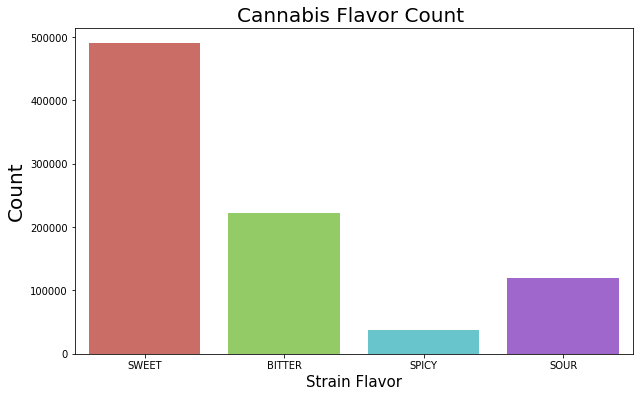

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x="flavor", data=strains, palette='hls')
plt.xlabel('Strain Flavor', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.title("Cannabis Flavor Count ", fontsize=20)
plt.show()


In [29]:
strains.head()

,name,id,race,flavor,positive_effect,negative_effect,illness
0,Afpak,1.0,hybrid,SWEET,Relaxed,Dizzy,Depression
1,Afpak,1.0,hybrid,BITTER,Relaxed,Dizzy,Depression
2,Afpak,1.0,hybrid,BITTER,Relaxed,Dizzy,Depression
3,African,2.0,sativa,SPICY,Euphoric,Dry Mouth,Depression
4,African,2.0,sativa,SWEET,Euphoric,Dry Mouth,Depression


In [30]:
pd.crosstab(strains.race, strains.positive_effect)

positive_effect,Aroused,Creative,Energetic,Euphoric,Focused,Giggly,Happy,Hungry,Relaxed,Sleepy,Talkative,Tingly,Uplifted
race,,,,,,,,,,,,,
hybrid,6060,34830,27240,64740,22440,13530,75750,15240,70650,15600,10770,8130,57630
indica,4020,11070,2190,39240,6930,6990,43200,17790,49620,33000,3000,6720,19620
sativa,2880,16530,21870,20310,13230,3060,27930,3210,15390,1170,4650,1500,24330


In [31]:
pd.crosstab(strains.race, strains.negative_effect)

negative_effect,Anxious,Dizzy,Dry Eyes,Dry Mouth,Paranoid
race,,,,,
hybrid,25170,34650,52410,63750,30420
indica,12600,24090,33030,40230,19650
sativa,10890,13950,19770,23280,13170


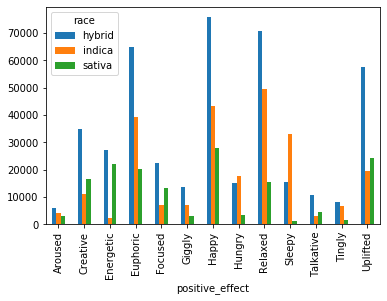

In [32]:
pd.crosstab(strains['positive_effect'], strains['race']).plot(kind='bar');

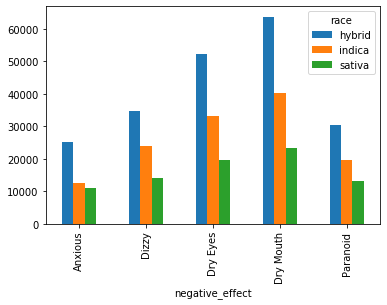

In [33]:
pd.crosstab(strains['negative_effect'], strains['race']).plot(kind='bar');

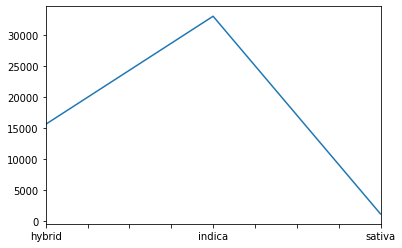

In [34]:
sleep = strains[(strains['positive_effect'] == 'Sleepy')]
sleep['race'].value_counts().sort_index().plot();

In [0]:
energetic = strains[(strains['positive_effect'] == 'Energetic')]


In [36]:
strains.loc[(strains['race'] == 'sativa') & (strains['negative_effect'] != 'Anxious') & (strains['flavor'] == 'SWEET') 
              & (strains['illness'] == 'Depression')]


,name,id,race,flavor,positive_effect,negative_effect,illness
4,African,2.0,sativa,SWEET,Euphoric,Dry Mouth,Depression
19,Alaska,8.0,sativa,SWEET,Relaxed,Dizzy,Depression
25,Alaskan Ice,10.0,sativa,SWEET,Euphoric,Dizzy,Depression
29,Alaskan Thunder Fuck,11.0,sativa,SWEET,Relaxed,Dizzy,Depression
39,Alice in Wonderland,15.0,sativa,SWEET,Relaxed,Dizzy,Depression
...,...,...,...,...,...,...,...
144804,Willie Nelson,2128.0,sativa,SWEET,Uplifted,NaN,Depression
144807,Willy Wonka,2129.0,sativa,SWEET,Talkative,NaN,Depression
144808,Willy Wonka,2129.0,sativa,SWEET,Talkative,NaN,Depression
144856,Xanadu,2147.0,sativa,SWEET,Focused,NaN,Depression


In [0]:
# import plotly.express as px
# fig = px.scatter(x=strains[illness], y=strains['race'])
# fig.show()

sativa = strains[strains['race'] == 'sativa']
indica = strains[strains['race'] == 'indica']
hybrid = strains[strains['race'] == 'hybrid']


In [0]:
sativa_ = strains['race'].value_counts()
new = pd.DataFrame({'race':sativa_.index, 'Count':sativa_.values})

##Positive Effects##


In [39]:
import pandas as pd
import plotly.graph_objects as go

#Cross-tabulate the example data frame.
df_cross = pd.crosstab(strains.race,strains.positive_effect)
# initiate data list for figure
data = []
#use for loop on every strain name to create bar data
for x in df_cross.columns:
   data.append(go.Bar(name=str(x), x=df_cross.index, y=df_cross[x]))

figure = go.Figure(data)
figure.update_layout(barmode = 'stack', title={
        'text': "Medical Mary Positive Effects",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         xaxis_title="Strain Type",
                    yaxis_title="Negative Effects",
                    font=dict(
                    family="Courier New, monospace",
                    size=13,
                    color="#7f7f7f"))

#For you to take a look at the result use
figure.show()

##Negative Effects##

In [40]:
import pandas as pd
import plotly.graph_objects as go

#Cross-tabulate the example data frame.
df_cross = pd.crosstab(strains.race,strains.negative_effect)
# initiate data list for figure
data = []
#use for loop on every strain name to create bar data
for x in df_cross.columns:
   data.append(go.Bar(name=str(x), x=df_cross.index, y=df_cross[x]))

figure = go.Figure(data)
figure.update_layout(barmode = 'stack', title="Medical Mary Negative Effects",
                     xaxis_title="Strain Type",
                    yaxis_title="Negative Effects",
                    font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"))

#For you to take a look at the result use
figure.show()

##Illness##

In [41]:
import pandas as pd
import plotly.graph_objects as go

#Cross-tabulate the example data frame.
df_cross = pd.crosstab(strains.illness,strains.id)
# initiate data list for figure
data = []
#use for loop on every strain name to create bar data
for x in df_cross.columns:
   data.append(go.Bar(name=str(x), x=df_cross.index, y=df_cross[x]))

figure = go.Figure(data)
figure.update_layout(barmode = 'stack', title="Medical Mary Negative Effects",
                     xaxis_title="Strain Type",
                    yaxis_title="Negative Effects",
                    font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"))

#For you to take a look at the result use
figure.show()

In [0]:
df = pd.read_csv('strains_text.csv')

In [43]:
df.head()

,id,name,race,flavors,positive,negative,medical,description,Combined
0,1,Afpak,hybrid,"['Earthy', 'Chemical', 'Pine']","['Relaxed', 'Hungry', 'Happy', 'Sleepy']",['Dizzy'],"['Depression', 'Insomnia', 'Pain', 'Stress', '...","['Afpak, named for its direct Afghani and Paki...","['Earthy', 'Chemical', 'Pine'],['Relaxed', 'Hu..."
1,2,African,sativa,"['Spicy/Herbal', 'Pungent', 'Earthy']","['Euphoric', 'Happy', 'Creative', 'Energetic',...",['Dry Mouth'],"['Depression', 'Pain', 'Stress', 'Lack of Appe...","[""African refers to\xa0the indigenous varietie...","['Spicy/Herbal', 'Pungent', 'Earthy'],['Euphor..."
2,3,Afternoon Delight,hybrid,"['Pepper', 'Flowery', 'Pine']","['Relaxed', 'Hungry', 'Euphoric', 'Uplifted', ...","['Dizzy', 'Dry Mouth', 'Paranoid']","['Depression', 'Insomnia', 'Pain', 'Stress', '...","['Afternoon Delight, created by Colorado Seed ...","['Pepper', 'Flowery', 'Pine'],['Relaxed', 'Hun..."
3,4,Afwreck,hybrid,"['Pine', 'Earthy', 'Flowery']","['Relaxed', 'Happy', 'Creative', 'Uplifted', '...","['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes']","['Pain', 'Stress', 'Headache', 'Fatigue', 'Hea...",['Afwreck is a hybrid cross of Afghani and Tra...,"['Pine', 'Earthy', 'Flowery'],['Relaxed', 'Hap..."
4,5,Agent Orange,hybrid,"['Citrus', 'Orange', 'Sweet']","['Relaxed', 'Euphoric', 'Happy', 'Energetic', ...","['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes']","['Depression', 'Pain', 'Stress', 'Nausea', 'He...","[""Don’t let the name scare you! The only herbi...","['Citrus', 'Orange', 'Sweet'],['Relaxed', 'Eup..."


In [44]:
import plotly.express as px
px.scatter_3d(
    df,
    x='name', 
    y='race', 
    z='medical', 
    text='race', 
    title='Medicare'
)

In [45]:
df.head()

,id,name,race,flavors,positive,negative,medical,description,Combined
0,1,Afpak,hybrid,"['Earthy', 'Chemical', 'Pine']","['Relaxed', 'Hungry', 'Happy', 'Sleepy']",['Dizzy'],"['Depression', 'Insomnia', 'Pain', 'Stress', '...","['Afpak, named for its direct Afghani and Paki...","['Earthy', 'Chemical', 'Pine'],['Relaxed', 'Hu..."
1,2,African,sativa,"['Spicy/Herbal', 'Pungent', 'Earthy']","['Euphoric', 'Happy', 'Creative', 'Energetic',...",['Dry Mouth'],"['Depression', 'Pain', 'Stress', 'Lack of Appe...","[""African refers to\xa0the indigenous varietie...","['Spicy/Herbal', 'Pungent', 'Earthy'],['Euphor..."
2,3,Afternoon Delight,hybrid,"['Pepper', 'Flowery', 'Pine']","['Relaxed', 'Hungry', 'Euphoric', 'Uplifted', ...","['Dizzy', 'Dry Mouth', 'Paranoid']","['Depression', 'Insomnia', 'Pain', 'Stress', '...","['Afternoon Delight, created by Colorado Seed ...","['Pepper', 'Flowery', 'Pine'],['Relaxed', 'Hun..."
3,4,Afwreck,hybrid,"['Pine', 'Earthy', 'Flowery']","['Relaxed', 'Happy', 'Creative', 'Uplifted', '...","['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes']","['Pain', 'Stress', 'Headache', 'Fatigue', 'Hea...",['Afwreck is a hybrid cross of Afghani and Tra...,"['Pine', 'Earthy', 'Flowery'],['Relaxed', 'Hap..."
4,5,Agent Orange,hybrid,"['Citrus', 'Orange', 'Sweet']","['Relaxed', 'Euphoric', 'Happy', 'Energetic', ...","['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes']","['Depression', 'Pain', 'Stress', 'Nausea', 'He...","[""Don’t let the name scare you! The only herbi...","['Citrus', 'Orange', 'Sweet'],['Relaxed', 'Eup..."


In [0]:
graph = df[['name', 'positive', 'medical']].copy()


In [47]:
graph.head()

,name,positive,medical
0,Afpak,"['Relaxed', 'Hungry', 'Happy', 'Sleepy']","['Depression', 'Insomnia', 'Pain', 'Stress', '..."
1,African,"['Euphoric', 'Happy', 'Creative', 'Energetic',...","['Depression', 'Pain', 'Stress', 'Lack of Appe..."
2,Afternoon Delight,"['Relaxed', 'Hungry', 'Euphoric', 'Uplifted', ...","['Depression', 'Insomnia', 'Pain', 'Stress', '..."
3,Afwreck,"['Relaxed', 'Happy', 'Creative', 'Uplifted', '...","['Pain', 'Stress', 'Headache', 'Fatigue', 'Hea..."
4,Agent Orange,"['Relaxed', 'Euphoric', 'Happy', 'Energetic', ...","['Depression', 'Pain', 'Stress', 'Nausea', 'He..."


In [48]:
import plotly.graph_objects as go
import pandas as pd



figure = go.Figure(data=[go.Table(
    header=dict(values=list(graph.columns),
               fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[graph.name, graph.positive, graph.medical],
               fill_color='lavender',
               align='left')),

])

figure.show()

In [0]:
import plotly.graph_objects as go
import pandas as pd



figure2 = go.Figure(data=[go.Table(
    header=dict(values=list(graph.columns),
               fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[strains.name, strains.positive_effect, strains.illness],
               fill_color='lavender',
               align='left')),

])

figure2.show()